## Тема проекта: Создание модели прогнозирующая цену турецкой недвижимости

### Необходимо проделать:
1. Определить необходимые поля и создать структуру набора данных. Определить, какие атрибуты имеют наибольшее влияние на цену и оставить только их для последующего обучения.
2. Провести предварительную обработку датасета: очистка данных от пустых и аномальных значений.
3. Написать функцию перевода в рубли, перевести дату и адрес в нормальный вид, функция обработки +(плюса) и пустых кв/м, заполнить Na, рапсределить тип сдачи жилья(dashbord),   
4. Вывести графики для визуального анализа
5. Обучить модели и сохранить лучшую из них

### 1. Подключение библиотек

In [3]:
import pandas as pd
import numpy as np
import re
import string
import nltk

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import seaborn as sns

### 2. Подключение датасета

In [126]:
dfn = pd.read_csv("C:\\Users\\User\\Downloads\\Telegram Desktop\\real_estate_data.csv",  low_memory=False) #low_memory определение типа данных столбцов после загрузки всех записей
dfn

id   type  sub_type start_date  end_date  listing_type  tom  \
0            1  Konut  Rezidans   12/10/18    1/9/19             2   30   
1            2  Konut     Daire    2/13/19       NaN             1   14   
2            3  Konut     Daire    10/9/18   11/8/18             1   30   
3            4  Konut  Rezidans    9/10/18  10/10/18             1   30   
4            5  Konut  Rezidans   12/10/18    1/9/19             1   30   
...        ...    ...       ...        ...       ...           ...  ...   
403482  403483  Konut     Daire    9/18/18       NaN             2  162   
403483  403484  Konut     Daire   10/11/18       NaN             1  139   
403484  403485  Konut     Daire   11/22/18       NaN             1   97   
403485  403486  Konut     Daire    2/21/19       NaN             2    6   
403486  403487  Konut     Daire    1/15/19   1/18/19             1    3   

       building_age total_floor_count      floor_no room_count   size  \
0                 0       20 ve üzeri             2        2+1   90.0   
1                 0       20 ve üzeri   20 ve üzeri        1+0   43.0   
2                 0                 1  Yüksek Giriş        2+1    NaN   
3                 3       20 ve üzeri   20 ve üzeri        6+1  450.0   
4                 0       20 ve üzeri             2        2+1   90.0   
...             ...               ...           ...        ...    ...   
403482          NaN               NaN           NaN          +    NaN   
403483          NaN               NaN           NaN        2+1    NaN   
403484          NaN               NaN           NaN        1+1    NaN   
403485          NaN               NaN           NaN        2+1    2.0   
403486          NaN               NaN           NaN        3+1  140.0   

                             address  furnished heating_type       price  \
0         İstanbul/Kartal/Kordonboyu        NaN      Fancoil      3500.0   
1         İstanbul/Kartal/Kordonboyu        NaN      Fancoil    490000.0   
2            Tekirdağ/Çorlu/Reşadiye        NaN      Fancoil    155000.0   
3           İstanbul/Beşiktaş/Levent        NaN      Fancoil  32500000.0   
4         İstanbul/Kartal/Kordonboyu        NaN      Fancoil   1450000.0   
...                              ...        ...          ...         ...   
403482     İstanbul/Sultanbeyli/Adil        NaN          NaN      1500.0   
403483  Sakarya/Adapazarı/Cumhuriyet        NaN          NaN    120000.0   
403484          Antalya/Alanya/Saray        NaN          NaN     48000.0   
403485        Aydın/Kuşadası/Türkmen        NaN          NaN       900.0   
403486    Kayseri/Melikgazi/Alpaslan        NaN          NaN    210000.0   

       price_currency  
0                 TRY  
1                 TRY  
2                 TRY  
3                 TRY  
4                 TRY  
...               ...  
403482            TRY  
403483            TRY  
403484            EUR  
403485            TRY  
403486            TRY  

[403487 rows x 17 columns]

## Описание признаков

type - Тип недвижимости

sub_type - Подгруппа «Тип недвижимости»

start_date	 - Дата начала размещения объявления на рынке

end_date - Дата прекращения размещения объявления на рынке

listing_type - Тип объявления (аренда или продажа)

tom	- Срок размещения на рынке

building_age - Возраст здания

total_floor_count - Количество этажей в здании

floor_no - Информация о номере этажа в данном листинге
 
room_count - Количество комнат в квартире

size - Площадь дома

address - Адрес жилья

furnished - Обстройство дома (с мебелью и без,техника, кухня)

heating_type - Различные типы систем отопления

price - Цена дома или аренды дома

price_currency - Валюта цены дома

In [129]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403487 entries, 0 to 403486
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 403487 non-null  int64  
 1   type               403487 non-null  object 
 2   sub_type           403487 non-null  object 
 3   start_date         403487 non-null  object 
 4   end_date           266298 non-null  object 
 5   listing_type       403487 non-null  int64  
 6   tom                403487 non-null  int64  
 7   building_age       376097 non-null  object 
 8   total_floor_count  375466 non-null  object 
 9   floor_no           368191 non-null  object 
 10  room_count         403487 non-null  object 
 11  size               257481 non-null  float64
 12  address            403487 non-null  object 
 13  furnished          0 non-null       float64
 14  heating_type       375517 non-null  object 
 15  price              402772 non-null  float64
 16  pr

In [131]:
dfn.describe()

id   listing_type            tom           size  furnished  \
count  403487.00000  403487.000000  403487.000000  257481.000000        0.0   
mean   201744.00000       1.294235      57.022739     279.349094        NaN   
std    116476.80837       0.467733      44.358933    9429.195331        NaN   
min         1.00000       1.000000       0.000000       1.000000        NaN   
25%    100872.50000       1.000000      29.000000      85.000000        NaN   
50%    201744.00000       1.000000      40.000000     110.000000        NaN   
75%    302615.50000       2.000000      90.000000     140.000000        NaN   
max    403487.00000       3.000000     180.000000  948235.000000        NaN   

              price  
count  4.027720e+05  
mean   3.546417e+05  
std    4.809503e+06  
min   -2.500000e+02  
25%    2.500000e+03  
50%    1.990000e+05  
75%    3.420000e+05  
max    2.000000e+09

In [133]:
dfn.id.duplicated().sum()

0

### При анализе датасета было замечано:
1. В признаке furnished нет значений, и также невозможно заполнить их в ручную поэтому было принято решение удалить этот столбец.
2. В признаке listing_type имеется значение 3, по справочной информации он не имеет значения. Таких записей всего 16, можно их удалить.
3. Присутсвуют жилье 1м².
4. Есть отрицательная и аномально высокая цена
5. Есть аномально высокая квадратура жилья
6. Отсутвуют записи на прекращение показа объявления

### Обработка датасета

In [137]:
del dfn["furnished"]

In [139]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403487 entries, 0 to 403486
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 403487 non-null  int64  
 1   type               403487 non-null  object 
 2   sub_type           403487 non-null  object 
 3   start_date         403487 non-null  object 
 4   end_date           266298 non-null  object 
 5   listing_type       403487 non-null  int64  
 6   tom                403487 non-null  int64  
 7   building_age       376097 non-null  object 
 8   total_floor_count  375466 non-null  object 
 9   floor_no           368191 non-null  object 
 10  room_count         403487 non-null  object 
 11  size               257481 non-null  float64
 12  address            403487 non-null  object 
 13  heating_type       375517 non-null  object 
 14  price              402772 non-null  float64
 15  price_currency     402772 non-null  object 
dtypes:

In [141]:
dfn[dfn['listing_type'] == 3]

id   type  sub_type start_date  end_date  listing_type  tom  \
361        362  Konut     Villa    11/9/18       NaN             3  110   
2003      2004  Konut     Daire    11/8/18       NaN             3  111   
2467      2468  Konut  Rezidans    1/26/19   2/25/19             3   30   
3097      3098  Konut  Rezidans     1/2/19       NaN             3   56   
3745      3746  Konut     Daire    11/8/18  11/20/18             3   12   
...        ...    ...       ...        ...       ...           ...  ...   
402477  402478  Konut     Daire    2/25/19       NaN             3    2   
402758  402759  Konut     Daire     9/3/18       NaN             3  177   
402875  402876  Konut     Daire     2/1/19       NaN             3   26   
403165  403166  Konut     Daire   11/22/18  12/22/18             3   30   
403389  403390  Konut     Daire   12/27/18       NaN             3   62   

       building_age total_floor_count floor_no room_count   size  \
361               2                 3    Kot 1        2+1    2.0   
2003     6-10 arası                 2        2        2+1   65.0   
2467              3       10-20 arası        2        1+1   52.0   
3097            NaN       10-20 arası       15        1+1    NaN   
3745     6-10 arası                 2        2        2+1  110.0   
...             ...               ...      ...        ...    ...   
402477          NaN               NaN      NaN        1+1   50.0   
402758          NaN               NaN      NaN          +    NaN   
402875          NaN               NaN      NaN          +  120.0   
403165          NaN               NaN      NaN          +    NaN   
403389          NaN               NaN      NaN          +   40.0   

                                  address heating_type   price price_currency  
361                Muğla/Bodrum/Yalıkavak      Fancoil  8000.0            TRY  
2003                  Muğla/Bodrum/Dirmil          Yok  1400.0            TRY  
2467    İstanbul/Beylikdüzü/Adnan Kahveci          Yok    50.0            TRY  
3097        İstanbul/Kartal/Soğanlık Yeni          Yok    80.0            TRY  
3745               Muğla/Bodrum/Yalıkavak          Yok  2250.0            TRY  
...                                   ...          ...     ...            ...  
402477                 İzmir/Buca/Atatürk          NaN    40.0            TRY  
402758        İstanbul/Kağıthane/Çağlayan          NaN   500.0            TRY  
402875         Bursa/Osmangazi/Altıparmak          NaN    75.0            TRY  
403165               İzmir/Konak/Alsancak          NaN   100.0            TRY  
403389       Denizli/Pamukkale/Pelitlibağ          NaN   120.0            TRY  

[2242 rows x 16 columns]

In [143]:
dfn.drop(dfn[dfn.listing_type == 3].index, inplace=True)

In [145]:
dfn[dfn.end_date.isna()]

id   type  sub_type start_date end_date  listing_type  tom  \
1            2  Konut     Daire    2/13/19      NaN             1   14   
6            7  Konut     Daire     1/4/19      NaN             2   54   
8            9  Konut     Daire    2/16/19      NaN             1   11   
14          15  Konut     Daire    9/22/18      NaN             1  158   
18          19  Konut  Rezidans   11/22/18      NaN             2   97   
...        ...    ...       ...        ...      ...           ...  ...   
403481  403482  Konut     Daire    1/12/19      NaN             1   46   
403482  403483  Konut     Daire    9/18/18      NaN             2  162   
403483  403484  Konut     Daire   10/11/18      NaN             1  139   
403484  403485  Konut     Daire   11/22/18      NaN             1   97   
403485  403486  Konut     Daire    2/21/19      NaN             2    6   

       building_age total_floor_count     floor_no room_count   size  \
1                 0       20 ve üzeri  20 ve üzeri        1+0   43.0   
6                 0       20 ve üzeri           14        3+1  160.0   
8               NaN                 2        Kot 2        3+1  140.0   
14                1                 4            3        3+1    NaN   
18                2       10-20 arası           13        1+0   50.0   
...             ...               ...          ...        ...    ...   
403481          NaN               NaN          NaN          +    NaN   
403482          NaN               NaN          NaN          +    NaN   
403483          NaN               NaN          NaN        2+1    NaN   
403484          NaN               NaN          NaN        1+1    NaN   
403485          NaN               NaN          NaN        2+1    2.0   

                                         address heating_type      price  \
1                     İstanbul/Kartal/Kordonboyu      Fancoil   490000.0   
6                     İstanbul/Kartal/Kordonboyu      Fancoil     3750.0   
8       Çanakkale/Ayvacık/Küçükkuyu Bld. (Mıhlı)      Fancoil  1500000.0   
14                      Manisa/Turgutlu/Şehitler      Fancoil    75000.0   
18                   İstanbul/Maltepe/Altayçeşme      Fancoil     2000.0   
...                                          ...          ...        ...   
403481                   İzmir/Menemen/Zeytinlik          NaN        NaN   
403482                 İstanbul/Sultanbeyli/Adil          NaN     1500.0   
403483              Sakarya/Adapazarı/Cumhuriyet          NaN   120000.0   
403484                      Antalya/Alanya/Saray          NaN    48000.0   
403485                    Aydın/Kuşadası/Türkmen          NaN      900.0   

       price_currency  
1                 TRY  
6                 TRY  
8                 TRY  
14                TRY  
18                TRY  
...               ...  
403481            NaN  
403482            TRY  
403483            TRY  
403484            EUR  
403485            TRY  

[136493 rows x 16 columns]

Удалили все значения, что имели listing_type - 3, так как в справочнике они не имели никакого значения.

In [147]:
# Исходный формат: м/д/г в д/м/г
dfn['start_date'] = pd.to_datetime(dfn['start_date'], format='mixed', yearfirst=False)
dfn['end_date'] = pd.to_datetime(dfn['end_date'], format='mixed', yearfirst=False)

In [149]:
dfn

id   type  sub_type start_date   end_date  listing_type  tom  \
0            1  Konut  Rezidans 2018-12-10 2019-01-09             2   30   
1            2  Konut     Daire 2019-02-13        NaT             1   14   
2            3  Konut     Daire 2018-10-09 2018-11-08             1   30   
3            4  Konut  Rezidans 2018-09-10 2018-10-10             1   30   
4            5  Konut  Rezidans 2018-12-10 2019-01-09             1   30   
...        ...    ...       ...        ...        ...           ...  ...   
403482  403483  Konut     Daire 2018-09-18        NaT             2  162   
403483  403484  Konut     Daire 2018-10-11        NaT             1  139   
403484  403485  Konut     Daire 2018-11-22        NaT             1   97   
403485  403486  Konut     Daire 2019-02-21        NaT             2    6   
403486  403487  Konut     Daire 2019-01-15 2019-01-18             1    3   

       building_age total_floor_count      floor_no room_count   size  \
0                 0       20 ve üzeri             2        2+1   90.0   
1                 0       20 ve üzeri   20 ve üzeri        1+0   43.0   
2                 0                 1  Yüksek Giriş        2+1    NaN   
3                 3       20 ve üzeri   20 ve üzeri        6+1  450.0   
4                 0       20 ve üzeri             2        2+1   90.0   
...             ...               ...           ...        ...    ...   
403482          NaN               NaN           NaN          +    NaN   
403483          NaN               NaN           NaN        2+1    NaN   
403484          NaN               NaN           NaN        1+1    NaN   
403485          NaN               NaN           NaN        2+1    2.0   
403486          NaN               NaN           NaN        3+1  140.0   

                             address heating_type       price price_currency  
0         İstanbul/Kartal/Kordonboyu      Fancoil      3500.0            TRY  
1         İstanbul/Kartal/Kordonboyu      Fancoil    490000.0            TRY  
2            Tekirdağ/Çorlu/Reşadiye      Fancoil    155000.0            TRY  
3           İstanbul/Beşiktaş/Levent      Fancoil  32500000.0            TRY  
4         İstanbul/Kartal/Kordonboyu      Fancoil   1450000.0            TRY  
...                              ...          ...         ...            ...  
403482     İstanbul/Sultanbeyli/Adil          NaN      1500.0            TRY  
403483  Sakarya/Adapazarı/Cumhuriyet          NaN    120000.0            TRY  
403484          Antalya/Alanya/Saray          NaN     48000.0            EUR  
403485        Aydın/Kuşadası/Türkmen          NaN       900.0            TRY  
403486    Kayseri/Melikgazi/Alpaslan          NaN    210000.0            TRY  

[401245 rows x 16 columns]

Преобразовали даты в привычный вид.

In [151]:
dfn['price_currency'].unique().tolist()

['TRY', 'GBP', 'EUR', 'USD', nan]

In [153]:
def convert_to_rubles(price, price_currency):
    exchange_rates = {
        'TRY':1.96,  
        'EUR': 94.34,  
        'USD': 80.57,  
        'GBP': 109.13,  
        'RUB': 1.0    
    }
    
    if pd.isna(price_currency) or price_currency not in exchange_rates:
        return np.nan
    
    return price * exchange_rates[price_currency]
dfn['price_rub'] = dfn.apply(lambda row: convert_to_rubles(row['price'], row['price_currency']), axis=1)

In [154]:
dfn

id   type  sub_type start_date   end_date  listing_type  tom  \
0            1  Konut  Rezidans 2018-12-10 2019-01-09             2   30   
1            2  Konut     Daire 2019-02-13        NaT             1   14   
2            3  Konut     Daire 2018-10-09 2018-11-08             1   30   
3            4  Konut  Rezidans 2018-09-10 2018-10-10             1   30   
4            5  Konut  Rezidans 2018-12-10 2019-01-09             1   30   
...        ...    ...       ...        ...        ...           ...  ...   
403482  403483  Konut     Daire 2018-09-18        NaT             2  162   
403483  403484  Konut     Daire 2018-10-11        NaT             1  139   
403484  403485  Konut     Daire 2018-11-22        NaT             1   97   
403485  403486  Konut     Daire 2019-02-21        NaT             2    6   
403486  403487  Konut     Daire 2019-01-15 2019-01-18             1    3   

       building_age total_floor_count      floor_no room_count   size  \
0                 0       20 ve üzeri             2        2+1   90.0   
1                 0       20 ve üzeri   20 ve üzeri        1+0   43.0   
2                 0                 1  Yüksek Giriş        2+1    NaN   
3                 3       20 ve üzeri   20 ve üzeri        6+1  450.0   
4                 0       20 ve üzeri             2        2+1   90.0   
...             ...               ...           ...        ...    ...   
403482          NaN               NaN           NaN          +    NaN   
403483          NaN               NaN           NaN        2+1    NaN   
403484          NaN               NaN           NaN        1+1    NaN   
403485          NaN               NaN           NaN        2+1    2.0   
403486          NaN               NaN           NaN        3+1  140.0   

                             address heating_type       price price_currency  \
0         İstanbul/Kartal/Kordonboyu      Fancoil      3500.0            TRY   
1         İstanbul/Kartal/Kordonboyu      Fancoil    490000.0            TRY   
2            Tekirdağ/Çorlu/Reşadiye      Fancoil    155000.0            TRY   
3           İstanbul/Beşiktaş/Levent      Fancoil  32500000.0            TRY   
4         İstanbul/Kartal/Kordonboyu      Fancoil   1450000.0            TRY   
...                              ...          ...         ...            ...   
403482     İstanbul/Sultanbeyli/Adil          NaN      1500.0            TRY   
403483  Sakarya/Adapazarı/Cumhuriyet          NaN    120000.0            TRY   
403484          Antalya/Alanya/Saray          NaN     48000.0            EUR   
403485        Aydın/Kuşadası/Türkmen          NaN       900.0            TRY   
403486    Kayseri/Melikgazi/Alpaslan          NaN    210000.0            TRY   

         price_rub  
0           6860.0  
1         960400.0  
2         303800.0  
3       63700000.0  
4        2842000.0  
...            ...  
403482      2940.0  
403483    235200.0  
403484   4528320.0  
403485      1764.0  
403486    411600.0  

[401245 rows x 17 columns]

Перевели текущие цены в зависимости от валюты на русские рубли и записали их в новый столбец.

In [155]:
dfn[['city', 'county', 'district']] = dfn['address'].str.split('/', expand=True)

In [156]:
del dfn["address"]

Разбили столбец address на 3 новых столбца, чтобы в дальнейшем удобно было работать с данными. И удалили сам столбец address.

In [157]:
dfn.drop(dfn[dfn['size'] < 15].index, inplace=True)

In [158]:
dfn.drop(dfn[dfn['size'] > 6000].index, inplace=True)

Произвели удаление данных, где площадь жилья меньше 15 квадратных метров и больше 6000 квадратных метров.

In [159]:
dfn.describe()

id                     start_date  \
count  400592.000000                         400592   
mean   201947.215077  2018-11-17 17:30:54.063985664   
min         1.000000            2018-08-31 00:00:00   
25%    101479.750000            2018-10-06 00:00:00   
50%    202012.500000            2018-11-12 00:00:00   
75%    302494.250000            2018-12-26 00:00:00   
max    403487.000000            2019-02-27 00:00:00   
std    116306.812528                            NaN   

                            end_date   listing_type            tom  \
count                         264341  400592.000000  400592.000000   
mean   2018-12-21 23:46:18.297728512       1.284878      57.052248   
min              2018-08-31 00:00:00       1.000000       0.000000   
25%              2018-11-18 00:00:00       1.000000      29.000000   
50%              2018-12-27 00:00:00       1.000000      40.000000   
75%              2019-01-28 00:00:00       2.000000      90.000000   
max              2019-02-27 00:00:00       2.000000     180.000000   
std                              NaN       0.451357      44.379264   

                size         price     price_rub  
count  255334.000000  3.998850e+05  3.998850e+05  
mean      127.569681  3.534476e+05  8.887077e+05  
min        15.000000 -2.500000e+02 -4.900000e+02  
25%        86.000000  2.600000e+03  5.096000e+03  
50%       110.000000  2.000000e+05  3.920000e+05  
75%       140.000000  3.450000e+05  6.840400e+05  
max      6000.000000  2.000000e+09  3.920000e+09  
std       121.038229  4.794743e+06  1.280534e+07

- Средняя продолжительность объявления: 57 дней
- Средний размер площади: 127.57
- Есть отрицательные цены - явные аномалии

In [160]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400592 entries, 0 to 403486
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 400592 non-null  int64         
 1   type               400592 non-null  object        
 2   sub_type           400592 non-null  object        
 3   start_date         400592 non-null  datetime64[ns]
 4   end_date           264341 non-null  datetime64[ns]
 5   listing_type       400592 non-null  int64         
 6   tom                400592 non-null  int64         
 7   building_age       373534 non-null  object        
 8   total_floor_count  372762 non-null  object        
 9   floor_no           365643 non-null  object        
 10  room_count         400592 non-null  object        
 11  size               255334 non-null  float64       
 12  heating_type       372808 non-null  object        
 13  price              399885 non-null  float64      

In [163]:
dfn.end_date.max()

Timestamp('2019-02-27 00:00:00')

In [164]:
dfn.tom.min()

0

Возвращаем самую позднюю дату в столбце 'end_date' и возвращаем минимальное значение в столбце 'tom'

In [173]:
dfn['end_date'].fillna(pd.Timestamp('2020-01-01'), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_1064\73080762.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfn['end_date'].fillna(pd.Timestamp('2020-01-01'), inplace=True)


Заменили пропущенные значения в end_date на дату 1 января 2020 года.

In [175]:
dfn['end_missed'] = dfn['end_date'].isna().astype(int)

In [177]:
dfn

id   type  sub_type start_date   end_date  listing_type  tom  \
0            1  Konut  Rezidans 2018-12-10 2019-01-09             2   30   
1            2  Konut     Daire 2019-02-13 2020-01-01             1   14   
2            3  Konut     Daire 2018-10-09 2018-11-08             1   30   
3            4  Konut  Rezidans 2018-09-10 2018-10-10             1   30   
4            5  Konut  Rezidans 2018-12-10 2019-01-09             1   30   
...        ...    ...       ...        ...        ...           ...  ...   
403481  403482  Konut     Daire 2019-01-12 2020-01-01             1   46   
403482  403483  Konut     Daire 2018-09-18 2020-01-01             2  162   
403483  403484  Konut     Daire 2018-10-11 2020-01-01             1  139   
403484  403485  Konut     Daire 2018-11-22 2020-01-01             1   97   
403486  403487  Konut     Daire 2019-01-15 2019-01-18             1    3   

       building_age total_floor_count      floor_no room_count   size  \
0                 0       20 ve üzeri             2        2+1   90.0   
1                 0       20 ve üzeri   20 ve üzeri        1+0   43.0   
2                 0                 1  Yüksek Giriş        2+1    NaN   
3                 3       20 ve üzeri   20 ve üzeri        6+1  450.0   
4                 0       20 ve üzeri             2        2+1   90.0   
...             ...               ...           ...        ...    ...   
403481          NaN               NaN           NaN          +    NaN   
403482          NaN               NaN           NaN          +    NaN   
403483          NaN               NaN           NaN        2+1    NaN   
403484          NaN               NaN           NaN        1+1    NaN   
403486          NaN               NaN           NaN        3+1  140.0   

       heating_type       price price_currency   price_rub      city  \
0           Fancoil      3500.0            TRY      6860.0  İstanbul   
1           Fancoil    490000.0            TRY    960400.0  İstanbul   
2           Fancoil    155000.0            TRY    303800.0  Tekirdağ   
3           Fancoil  32500000.0            TRY  63700000.0  İstanbul   
4           Fancoil   1450000.0            TRY   2842000.0  İstanbul   
...             ...         ...            ...         ...       ...   
403481          NaN         NaN            NaN         NaN     İzmir   
403482          NaN      1500.0            TRY      2940.0  İstanbul   
403483          NaN    120000.0            TRY    235200.0   Sakarya   
403484          NaN     48000.0            EUR   4528320.0   Antalya   
403486          NaN    210000.0            TRY    411600.0   Kayseri   

             county    district  end_missed  
0            Kartal  Kordonboyu           0  
1            Kartal  Kordonboyu           0  
2             Çorlu    Reşadiye           0  
3          Beşiktaş      Levent           0  
4            Kartal  Kordonboyu           0  
...             ...         ...         ...  
403481      Menemen   Zeytinlik           0  
403482  Sultanbeyli        Adil           0  
403483    Adapazarı  Cumhuriyet           0  
403484       Alanya       Saray           0  
403486    Melikgazi    Alpaslan           0  

[400592 rows x 20 columns]

Создали новый столбец end_missed, где:
- 1 - если в исходном end_date было пропущено значение
- 0 - если значение присутствовало

In [179]:
dfn['building_age'].fillna(value="0", inplace=True, axis=0)
dfn['total_floor_count'].fillna(value="0", inplace=True, axis=0)
dfn['floor_no'].fillna(value="0", inplace=True, axis=0)
dfn['heating_type'].fillna(value="Yok", inplace=True, axis=0)

C:\Users\User\AppData\Local\Temp\ipykernel_1064\289991935.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfn['building_age'].fillna(value="0", inplace=True, axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_1064\289991935.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

Заполненили пропуски в категориальных и числовых признаках.

In [181]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400592 entries, 0 to 403486
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 400592 non-null  int64         
 1   type               400592 non-null  object        
 2   sub_type           400592 non-null  object        
 3   start_date         400592 non-null  datetime64[ns]
 4   end_date           400592 non-null  datetime64[ns]
 5   listing_type       400592 non-null  int64         
 6   tom                400592 non-null  int64         
 7   building_age       400592 non-null  object        
 8   total_floor_count  400592 non-null  object        
 9   floor_no           400592 non-null  object        
 10  room_count         400592 non-null  object        
 11  size               255334 non-null  float64       
 12  heating_type       400592 non-null  object        
 13  price              399885 non-null  float64      

In [183]:
dfn.drop(dfn[dfn['district'].isna()].index, inplace=True)

Были записи в которых не указана страна и улица, их было мало, поэтому мы их удалили.

In [185]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400576 entries, 0 to 403486
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 400576 non-null  int64         
 1   type               400576 non-null  object        
 2   sub_type           400576 non-null  object        
 3   start_date         400576 non-null  datetime64[ns]
 4   end_date           400576 non-null  datetime64[ns]
 5   listing_type       400576 non-null  int64         
 6   tom                400576 non-null  int64         
 7   building_age       400576 non-null  object        
 8   total_floor_count  400576 non-null  object        
 9   floor_no           400576 non-null  object        
 10  room_count         400576 non-null  object        
 11  size               255326 non-null  float64       
 12  heating_type       400576 non-null  object        
 13  price              399869 non-null  float64      

In [187]:
dfn.drop(dfn[dfn['price'].isna()].index, inplace=True)

In [189]:
dfn.drop(dfn[dfn['price'] <= 0 ].index, inplace=True)

Удалили все строки, где значение в столбце price меньше или равно нулю, а также есть записи с отсутвующей и отрицательной ценой жилья.

In [191]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399824 entries, 0 to 403486
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 399824 non-null  int64         
 1   type               399824 non-null  object        
 2   sub_type           399824 non-null  object        
 3   start_date         399824 non-null  datetime64[ns]
 4   end_date           399824 non-null  datetime64[ns]
 5   listing_type       399824 non-null  int64         
 6   tom                399824 non-null  int64         
 7   building_age       399824 non-null  object        
 8   total_floor_count  399824 non-null  object        
 9   floor_no           399824 non-null  object        
 10  room_count         399824 non-null  object        
 11  size               255224 non-null  float64       
 12  heating_type       399824 non-null  object        
 13  price              399824 non-null  float64      

*Остались записи имеющие в кол-ве комнат только знак "+", нужно заменить их на 0+1. Также есть записи с отсутвующими размерами жилья, напишем функию, определяющая тип жилья и подстановкой медианным значением этого типа размера жилья* 

In [194]:
def add_plus_one(value):
    if(value == "+"):
        return "0+1"
    else:
        return value

In [196]:
dfn.sub_type.value_counts()

sub_type
Daire                  351486
Villa                   21163
Müstakil Ev              9489
Rezidans                 7447
Yazlık                   5910
Komple Bina              2579
Prefabrik Ev              670
Çiftlik Evi               497
Köşk / Konak / Yalı       296
Yalı Dairesi              186
Kooperatif                 67
Loft                       34
Name: count, dtype: int64

In [198]:
median_daire = dfn[(dfn['size'].notnull()) & (dfn['sub_type'] == "Daire")]['size'].median()
median_villa = dfn[(dfn['size'].notnull()) & (dfn['sub_type'] == "Villa")]['size'].median()
median_müstakil = dfn[(dfn['size'].notnull()) & (dfn['sub_type'] == "Müstakil Ev")]['size'].median()
median_Rezidans = dfn[(dfn['size'].notnull()) & (dfn['sub_type'] == "Rezidans")]['size'].median()
median_Yazlık = dfn[(dfn['size'].notnull()) & (dfn['sub_type'] == "Yazlık")]['size'].median()
median_Komple = dfn[(dfn['size'].notnull()) & (dfn['sub_type'] == "Komple Bina")]['size'].median()
median_Prefabrik_Ev = dfn[(dfn['size'].notnull()) & (dfn['sub_type'] == "Prefabrik Ev")]['size'].median()
median_Çiftlik = dfn[(dfn['size'].notnull()) & (dfn['sub_type'] == "Çiftlik Evi")]['size'].median()
median_Köşk = dfn[(dfn['size'].notnull()) & (dfn['sub_type'] == "Köşk / Konak / Yalı")]['size'].median()
median_Yalı_Dairesi = dfn[(dfn['size'].notnull()) & (dfn['sub_type'] == "Yalı Dairesi")]['size'].median()
median_Kooperatif = dfn[(dfn['size'].notnull()) & (dfn['sub_type'] == "Kooperatif")]['size'].median()
median_Loft = dfn[(dfn['size'].notnull()) & (dfn['sub_type'] == "Loft")]['size'].median()

In [200]:
medians = {"Daire" : median_daire, "Villa" : median_villa, "Müstakil Ev": median_müstakil, "Rezidans": median_Rezidans,
           "Yazlık": median_Yazlık, "Komple Bina": median_Komple, "Prefabrik Ev": median_Prefabrik_Ev, "Çiftlik Evi": median_Çiftlik,
          "Köşk / Konak / Yalı": median_Köşk, "Yalı Dairesi": median_Yalı_Dairesi, "Kooperatif" : median_Kooperatif, "Loft": median_Loft}

Создали словарь, который сопоставляет каждый тип жилья с его средней рыночной ценой.

In [202]:
def fill_medians(row):
    if pd.isna(row['size']) and row['sub_type'] in medians:
        return medians[row['sub_type']]
    else:
        return row['size']

In [204]:
dfn['size'] = dfn.apply(fill_medians, axis=1)

In [206]:
dfn['room_count'] = dfn['room_count'].apply(add_plus_one)

Увеличиваем значения количества комнат на 1.

In [212]:
dfn['room_count'].unique()

array(['2+1', '1+0', '6+1', '1+1', '3+1', '4+1', '2+2', '9+2', '5+2',
       '6+2', '4+3', '9+5', '5+1', '3+2', '0+1', '4+2', '7+2', '8+2',
       '8+3', '8+1', '7+1', '10+1', '10+0', '9+3', '8+4', '7+3', '10+2',
       '6+3', '9+4', '5+3', '9+1', '0+0', '10+5', '10+3', '10+4', '11+3',
       '15+5'], dtype=object)

 Выводим уникальные значения комнат после преобразования.

In [216]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399824 entries, 0 to 403486
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 399824 non-null  int64         
 1   type               399824 non-null  object        
 2   sub_type           399824 non-null  object        
 3   start_date         399824 non-null  datetime64[ns]
 4   end_date           399824 non-null  datetime64[ns]
 5   listing_type       399824 non-null  int64         
 6   tom                399824 non-null  int64         
 7   building_age       399824 non-null  object        
 8   total_floor_count  399824 non-null  object        
 9   floor_no           399824 non-null  object        
 10  room_count         399824 non-null  object        
 11  size               399824 non-null  float64       
 12  heating_type       399824 non-null  object        
 13  price              399824 non-null  float64      

In [218]:
del dfn['id']

In [220]:
del dfn['type']

Удалили признак id и type, так как они не играют роли в работе с данными.

In [226]:
dfn.building_age.unique()

array(['0', '3', '2', '1', '6-10 arası', '4', '26-30 arası',
       '40 ve üzeri', '11-15 arası', '16-20 arası', '5', '21-25 arası',
       '31-35 arası', '36-40 arası'], dtype=object)

In [228]:
def convert_value(x):
    convet_dict = {
        '6-10 arası': 8,
        '26-30 arası': 28,
        '40 ve üzeri': 45,
        '11-15 arası': 13,
        '16-20 arası': 18,
        '21-25 arası': 23,
        '31-35 arası': 33,
        '36-40 arası': 38
    }
    
    x_str = str(x).strip()
    if x_str in convet_dict:
        return convet_dict[x_str]
    else:
        return int(x_str)

dfn['building_age'] = dfn['building_age'].apply(convert_value)

In [230]:
dfn.building_age.unique()

array([ 0,  3,  2,  1,  8,  4, 28, 45, 13, 18,  5, 23, 33, 38],
      dtype=int64)

 Преобразовали категориальные значения возраста здания в числовые значения.

In [232]:
dfn.total_floor_count.unique()

array(['20 ve üzeri', '1', '10-20 arası', '4', '2', '3', '8', '6', '5',
       '0', '10', '9', '7'], dtype=object)

In [234]:
def convert_floor_count(x):
    convet_dict = {
        '20 ve üzeri': 20,
        '10-20 arası': 15
    }
    
    x_str = str(x).strip()
    if x_str in convet_dict:
        return convet_dict[x_str]
    else:
        return int(x_str)

dfn['total_floor_count'] = dfn['total_floor_count'].apply(convert_floor_count)

In [236]:
dfn.total_floor_count.unique()

array([20,  1, 15,  4,  2,  3,  8,  6,  5,  0, 10,  9,  7], dtype=int64)

 Также преобразовали категориальные значения количества этажей в здании в числовые.

In [238]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399824 entries, 0 to 403486
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   sub_type           399824 non-null  object        
 1   start_date         399824 non-null  datetime64[ns]
 2   end_date           399824 non-null  datetime64[ns]
 3   listing_type       399824 non-null  int64         
 4   tom                399824 non-null  int64         
 5   building_age       399824 non-null  int64         
 6   total_floor_count  399824 non-null  int64         
 7   floor_no           399824 non-null  object        
 8   room_count         399824 non-null  object        
 9   size               399824 non-null  float64       
 10  heating_type       399824 non-null  object        
 11  price              399824 non-null  float64       
 12  price_currency     399824 non-null  object        
 13  price_rub          399824 non-null  float64      

In [268]:
dfn.describe()

start_date                       end_date  \
count                         399824                         399824   
mean   2018-11-17 17:19:49.027171840  2019-04-28 01:43:46.131497728   
min              2018-08-31 00:00:00            2018-08-31 00:00:00   
25%              2018-10-05 00:00:00            2018-12-09 00:00:00   
50%              2018-11-12 00:00:00            2019-01-29 00:00:00   
75%              2018-12-26 00:00:00            2020-01-01 00:00:00   
max              2019-02-27 00:00:00            2020-01-01 00:00:00   
std                              NaN                            NaN   

        listing_type            tom   building_age  total_floor_count  \
count  399824.000000  399824.000000  399824.000000      399824.000000   
mean        1.285070      56.975972       6.455480           5.395799   
min         1.000000       0.000000       0.000000           0.000000   
25%         1.000000      29.000000       0.000000           3.000000   
50%         1.000000      40.000000       2.000000           4.000000   
75%         2.000000      90.000000       8.000000           6.000000   
max         2.000000     180.000000      45.000000          20.000000   
std         0.451449      44.330968       8.613448           4.195335   

                size         price     price_rub  
count  399824.000000  3.998240e+05  3.998240e+05  
mean      123.649966  3.534927e+05  8.888259e+05  
min        15.000000  1.000000e+00  1.960000e+00  
25%       100.000000  2.600000e+03  5.194000e+03  
50%       110.000000  2.000000e+05  3.920000e+05  
75%       130.000000  3.450000e+05  6.840400e+05  
max      6000.000000  2.000000e+09  3.920000e+09  
std        97.880261  4.795106e+06  1.280632e+07

- Все столбцы полностью заполнены - пропусков нет.
- Возраст зданий составил от 0 до 45 лет, медиана: 2 года, означает, что большинство зданий новые.
- Этажность домов максимум 20, при этом 75% зданий имеют 6 этажей.
- Срдений размер площади 123,6 м².

In [252]:
del dfn['end_missed']

In [222]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [224]:
from geopy.geocoders import Nominatim
import pandas as pd
import time

def add_coordinates_to_counties(df: pd.DataFrame) -> pd.DataFrame:
    geolocator = Nominatim(user_agent="turkey_counties_geocoder")
    
    unique_counties = df['county'].unique()
    data = []
    
    for county in unique_counties:
        try:
            location = geolocator.geocode(f"{county}, Turkey")
            
            if location:
                data.append({
                    'county': county,
                    'latitude': location.latitude,
                    'longitude': location.longitude
                })
                print(f"✓ {county}: {location.latitude}, {location.longitude}")
            else:
                data.append({
                    'county': county,
                    'latitude': None,
                    'longitude': None
                })
                print(f"✗ {county}: не найдено")
            
            time.sleep(1)
            
        except Exception as e:
            print(f"Ошибка для {county}: {e}")
            data.append({
                'county': county,
                'latitude': None,
                'longitude': None
            })
    
    return pd.DataFrame(data)

df = dfn
df_coordinates = add_coordinates_to_counties(df)

print(f"\nСтатистика:")
print(f"Успешно найдено координат: {df_coordinates['latitude'].notna().sum()}")
print(f"Не найдено координат: {df_coordinates['latitude'].isna().sum()}")

✓ Kartal: 40.88858, 29.1856536
✓ Çorlu: 41.1590875, 27.8041066
✓ Beşiktaş: 41.0428465, 29.0075283
✓ Maltepe: 40.9247539, 29.1310782
✓ Urla: 38.3228184, 26.7672998
✓ Ayvacık: 38.6358928, 27.2119241
✓ Fatih: 41.0192846, 28.9479296
✓ Bodrum: 37.0343987, 27.430651
✓ Bayraklı: 38.4639144, 27.1644029
✓ Efeler: 37.8471749, 27.8337255
✓ Yenişehir: 36.7822772, 34.5924486
✓ Turgutlu: 38.5000458, 27.7084176
✓ Şişli: 41.0637891, 28.9831642
✓ Çankaya: 39.8853321, 32.8554966
✓ Bağcılar: 41.034547, 28.8567558
✓ Edremit: 39.5938352, 27.0156844
✓ Merkez: 41.1344539, 29.0926456
✓ Gömeç: 41.4353177, 33.8212975
✓ Karaburun: 38.6354423, 26.5098027
✓ Bornova: 38.4660651, 27.2190721
✓ Avcılar: 40.9799389, 28.7216689
✓ Nazilli: 37.9097512, 28.3242062
✓ Beykoz: 41.1343001, 29.0920378
✓ Güzelbahçe: 38.357797, 26.8882993
✓ Menemen: 38.6077359, 27.0732772
✓ Sarıyer: 41.1685803, 29.0572623
✓ Seferihisar: 38.1953539, 26.8384935
✓ Burhaniye: 39.5030179, 26.9807391
✓ Ayvalık: 39.3180962, 26.6916708
✗ Gazimağusa: не н

Преобразовали названия районов в географические координаты (широты и долготы) для последующего пространственного анализа.

#### Сохранение обработанного датасета

In [276]:
dfn = df.merge(df_coordinates, on='county', how='left')
dfn.to_csv('Turtsia_obr.csv', index=False, encoding='utf-8-sig')

In [278]:
dfn

sub_type start_date   end_date  listing_type  tom  building_age  \
0       Rezidans 2018-12-10 2019-01-09             2   30             0   
1          Daire 2019-02-13 2020-01-01             1   14             0   
2          Daire 2018-10-09 2018-11-08             1   30             0   
3       Rezidans 2018-09-10 2018-10-10             1   30             3   
4       Rezidans 2018-12-10 2019-01-09             1   30             0   
...          ...        ...        ...           ...  ...           ...   
399819     Daire 2018-09-25 2019-01-23             1  120             0   
399820     Daire 2018-09-18 2020-01-01             2  162             0   
399821     Daire 2018-10-11 2020-01-01             1  139             0   
399822     Daire 2018-11-22 2020-01-01             1   97             0   
399823     Daire 2019-01-15 2019-01-18             1    3             0   

        total_floor_count      floor_no room_count   size heating_type  \
0                      20             2        2+1   90.0      Fancoil   
1                      20   20 ve üzeri        1+0   43.0      Fancoil   
2                       1  Yüksek Giriş        2+1  110.0      Fancoil   
3                      20   20 ve üzeri        6+1  450.0      Fancoil   
4                      20             2        2+1   90.0      Fancoil   
...                   ...           ...        ...    ...          ...   
399819                  0             0        3+1  110.0          Yok   
399820                  0             0        0+1  110.0          Yok   
399821                  0             0        2+1  110.0          Yok   
399822                  0             0        1+1  110.0          Yok   
399823                  0             0        3+1  140.0          Yok   

             price price_currency   price_rub      city       county  \
0           3500.0            TRY      6860.0  İstanbul       Kartal   
1         490000.0            TRY    960400.0  İstanbul       Kartal   
2         155000.0            TRY    303800.0  Tekirdağ        Çorlu   
3       32500000.0            TRY  63700000.0  İstanbul     Beşiktaş   
4        1450000.0            TRY   2842000.0  İstanbul       Kartal   
...            ...            ...         ...       ...          ...   
399819    185000.0            TRY    362600.0     Aydın        Didim   
399820      1500.0            TRY      2940.0  İstanbul  Sultanbeyli   
399821    120000.0            TRY    235200.0   Sakarya    Adapazarı   
399822     48000.0            EUR   4528320.0   Antalya       Alanya   
399823    210000.0            TRY    411600.0   Kayseri    Melikgazi   

          district   latitude  longitude  
0       Kordonboyu  40.888580  29.185654  
1       Kordonboyu  40.888580  29.185654  
2         Reşadiye  41.159087  27.804107  
3           Levent  41.042847  29.007528  
4       Kordonboyu  40.888580  29.185654  
...            ...        ...        ...  
399819      Efeler  37.376917  27.266813  
399820        Adil  40.967024  29.267131  
399821  Cumhuriyet  40.775519  30.402090  
399822       Saray  36.886573  30.703024  
399823    Alpaslan  38.719906  35.505662  

[399824 rows x 19 columns]

### Визуальный анализ данных

In [282]:
dfn = pd.read_csv("C:\\Users\\User\\Downloads\\Telegram Desktop\\Turtsia_obr.csv",  low_memory=False)
dfn

sub_type  start_date    end_date  listing_type  tom  building_age  \
0       Rezidans  2018-12-10  2019-01-09             2   30             0   
1          Daire  2019-02-13  2020-01-01             1   14             0   
2          Daire  2018-10-09  2018-11-08             1   30             0   
3       Rezidans  2018-09-10  2018-10-10             1   30             3   
4       Rezidans  2018-12-10  2019-01-09             1   30             0   
...          ...         ...         ...           ...  ...           ...   
399819     Daire  2018-09-25  2019-01-23             1  120             0   
399820     Daire  2018-09-18  2020-01-01             2  162             0   
399821     Daire  2018-10-11  2020-01-01             1  139             0   
399822     Daire  2018-11-22  2020-01-01             1   97             0   
399823     Daire  2019-01-15  2019-01-18             1    3             0   

        total_floor_count      floor_no room_count   size heating_type  \
0                      20             2        2+1   90.0      Fancoil   
1                      20   20 ve üzeri        1+0   43.0      Fancoil   
2                       1  Yüksek Giriş        2+1  110.0      Fancoil   
3                      20   20 ve üzeri        6+1  450.0      Fancoil   
4                      20             2        2+1   90.0      Fancoil   
...                   ...           ...        ...    ...          ...   
399819                  0             0        3+1  110.0          Yok   
399820                  0             0        0+1  110.0          Yok   
399821                  0             0        2+1  110.0          Yok   
399822                  0             0        1+1  110.0          Yok   
399823                  0             0        3+1  140.0          Yok   

             price price_currency   price_rub      city       county  \
0           3500.0            TRY      6860.0  İstanbul       Kartal   
1         490000.0            TRY    960400.0  İstanbul       Kartal   
2         155000.0            TRY    303800.0  Tekirdağ        Çorlu   
3       32500000.0            TRY  63700000.0  İstanbul     Beşiktaş   
4        1450000.0            TRY   2842000.0  İstanbul       Kartal   
...            ...            ...         ...       ...          ...   
399819    185000.0            TRY    362600.0     Aydın        Didim   
399820      1500.0            TRY      2940.0  İstanbul  Sultanbeyli   
399821    120000.0            TRY    235200.0   Sakarya    Adapazarı   
399822     48000.0            EUR   4528320.0   Antalya       Alanya   
399823    210000.0            TRY    411600.0   Kayseri    Melikgazi   

          district   latitude  longitude  
0       Kordonboyu  40.888580  29.185654  
1       Kordonboyu  40.888580  29.185654  
2         Reşadiye  41.159087  27.804107  
3           Levent  41.042847  29.007528  
4       Kordonboyu  40.888580  29.185654  
...            ...        ...        ...  
399819      Efeler  37.376917  27.266813  
399820        Adil  40.967024  29.267131  
399821  Cumhuriyet  40.775519  30.402090  
399822       Saray  36.886573  30.703024  
399823    Alpaslan  38.719906  35.505662  

[399824 rows x 19 columns]

<Axes: xlabel='building_age', ylabel='count'>

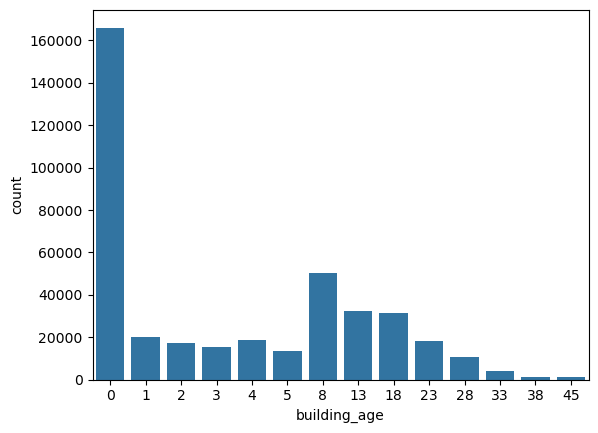

In [660]:
sns.countplot(data=dfn, x="building_age")

*Большинство объектов имеют возраст 0 лет, являются новые здания.*

### Матрица корреляций

__Корреляция числовых признаков__

Text(0.5, 1.0, 'Матрица корреляции признаков')

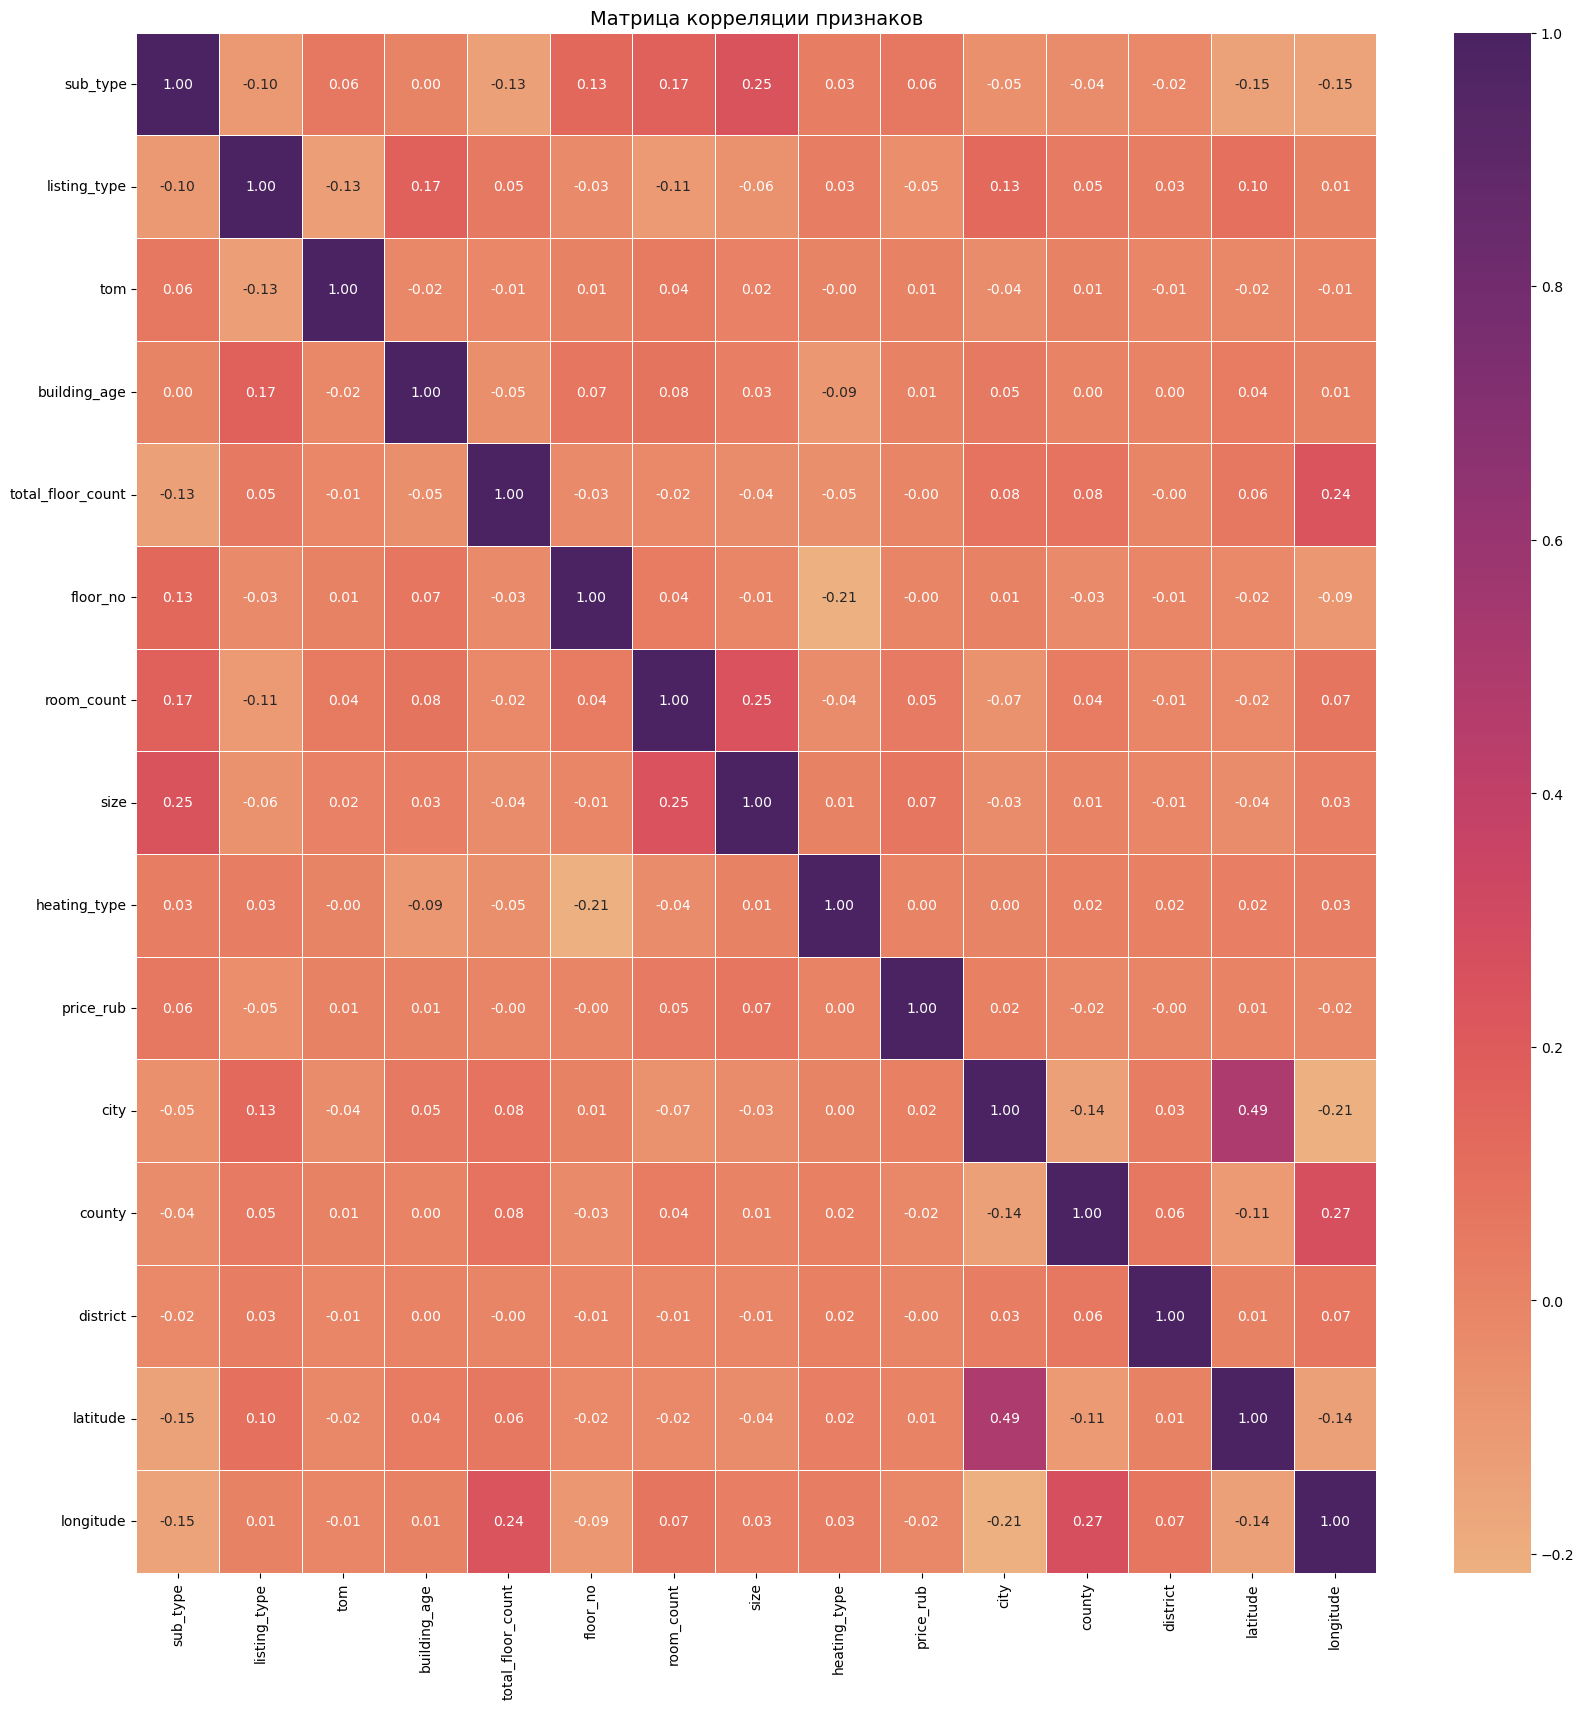

In [541]:
df_nums = df_processed


plt.figure(figsize=(20, 20))
sns.heatmap(df_nums.corr(), annot=True, cmap='flare',linewidths=0.5,
fmt='.2f')

plt.title('Матрица корреляции признаков', fontsize=14)

Матрица корреляций показала, что
- Чем больше комнат, тем больше площадь
- Определенные типы недвижимости имеют характерные размеры

### Предподготовка датасета и обучение двух моделей на ансамблевых методах

In [330]:
def preprocess_data(df):
    df = df.copy()
    df = df.drop(['start_date', 'end_date'], axis=1)
    df = df.drop(['price_currency', 'price'], axis=1)

    categorical_features = ['sub_type', 'room_count', 'floor_no',
                           'heating_type', 'city', 'county', 'district']

    numerical_features = ['listing_type', 'tom', 'building_age', 'total_floor_count', 
                          'size', 'latitude','longitude']
    
    return df, categorical_features, numerical_features

df_processed, cat_features, num_features = preprocess_data(dfn)

Удалили исходные колонки дат, колонки валют кроме рублевых, далее обработка категориальных признаков и числовых признаков.

In [332]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399824 entries, 0 to 399823
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sub_type           399824 non-null  object 
 1   listing_type       399824 non-null  int64  
 2   tom                399824 non-null  int64  
 3   building_age       399824 non-null  int64  
 4   total_floor_count  399824 non-null  int64  
 5   floor_no           399824 non-null  object 
 6   room_count         399824 non-null  object 
 7   size               399824 non-null  float64
 8   heating_type       399824 non-null  object 
 9   price_rub          399824 non-null  float64
 10  city               399824 non-null  object 
 11  county             399824 non-null  object 
 12  district           399824 non-null  object 
 13  latitude           399710 non-null  float64
 14  longitude          399710 non-null  float64
dtypes: float64(4), int64(4), object(7)
memory usage: 45

In [334]:
df_processed.dropna(inplace=True)

In [336]:
from sklearn.preprocessing import LabelEncoder
for col in cat_features:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col].astype(str))

Выполнили кодирование категориальных признаков с помощью LabelEncoder.

In [308]:
df_processed.to_csv('Turtsia_processed.csv', index=False, encoding='utf-8-sig')

### Обучение моделей

#### Загрузка предобработанного датасета

In [157]:
# Регрессия
df_processed = pd.read_csv("C:\\Users\\User\\Downloads\\Telegram Desktop\\Turtsia_processed.csv",  low_memory=False)
df_processed

sub_type  listing_type  tom  building_age  total_floor_count  \
0              7             2   30             0                 20   
1              0             1   14             0                 20   
2              0             1   30             0                  1   
3              7             1   30             3                 20   
4              7             1   30             0                 20   
...          ...           ...  ...           ...                ...   
399705         0             1  120             0                  0   
399706         0             2  162             0                  0   
399707         0             1  139             0                  0   
399708         0             1   97             0                  0   
399709         0             1    3             0                  0   

        floor_no  room_count   size  heating_type   price_rub  city  county  \
0             12          12   90.0             0      6860.0    78     244   
1             13           2   43.0             0    960400.0    78     244   
2             33          12  110.0             0    303800.0    66     480   
3             13          22  450.0             0  63700000.0    78      87   
4             12          12   90.0             0   2842000.0    78     244   
...          ...         ...    ...           ...         ...   ...     ...   
399705         0          14  110.0            15    362600.0     9     129   
399706         0           1  110.0            15      2940.0    78     388   
399707         0          12  110.0            15    235200.0    61       4   
399708         0           3  110.0            15   4528320.0     6      22   
399709         0          14  140.0            15    411600.0    42     305   

        district   latitude  longitude  
0           2424  40.888580  29.185654  
1           2424  40.888580  29.185654  
2           3220  41.159087  27.804107  
3           2721  41.042847  29.007528  
4           2424  40.888580  29.185654  
...          ...        ...        ...  
399705      1240  37.376917  27.266813  
399706        95  40.967024  29.267131  
399707       998  40.775519  30.402090  
399708      3295  36.886573  30.703024  
399709       314  38.719906  35.505662  

[399710 rows x 15 columns]

In [159]:
df_processed.drop(df_processed[df_processed['price_rub'] < 500].index, inplace=True)

In [64]:
# Классификация
dfn = pd.read_csv("C:\\Users\\User\\Downloads\\Telegram Desktop\\Turtsia_obr.csv",  low_memory=False)

In [66]:
dfn.dropna(inplace=True)

In [68]:
dfn.isna().sum()

sub_type             0
start_date           0
end_date             0
listing_type         0
tom                  0
building_age         0
total_floor_count    0
floor_no             0
room_count           0
size                 0
heating_type         0
price                0
price_currency       0
price_rub            0
city                 0
county               0
district             0
latitude             0
longitude            0
dtype: int64

#### Модель для предсказания типа жилья

In [467]:
# pip install catboost

   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 1.0/102.4 MB 3.6 MB/s eta 0:00:29
    --------------------------------------- 1.8/102.4 MB 3.9 MB/s eta 0:00:26
   - -------------------------------------- 2.9/102.4 MB 4.2 MB/s eta 0:00:24
   - -------------------------------------- 3.4/102.4 MB 3.9 MB/s eta 0:00:26
   - -------------------------------------- 4.2/102.4 MB 3.9 MB/s eta 0:00:26
   - -------------------------------------- 5.0/102.4 MB 3.9 MB/s eta 0:00:26
   -- ------------------------------------- 5.8/102.4 MB 3.8 MB/s eta 0:00:26
   -- ------------------------------------- 6.6/102.4 MB 3.7 MB/s eta 0:00:26
   -- ------------------------------------- 7.3/102.4 MB 3.8 MB/s eta 0:00:26
   --- ------------------------------------ 7.9/102.4 MB 3.8 MB/s eta 0:00:25
   --- ------------------------------------ 8.7/102.4 MB 3.7 MB/s eta 0:00:26


In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder

In [73]:
dfn['start_date'] = pd.to_datetime(dfn['start_date'])
dfn['end_date'] = pd.to_datetime(dfn['end_date'])

dfn['start_year'] = dfn['start_date'].dt.year
dfn['start_month'] = dfn['start_date'].dt.month
dfn['start_day'] = dfn['start_date'].dt.day
dfn['end_year'] = dfn['end_date'].dt.year
dfn['end_month'] = dfn['end_date'].dt.month
dfn['end_day'] = dfn['end_date'].dt.day

dfn = dfn.drop(['start_date', 'end_date'], axis=1)

Преобразуем даты, создаем числовые признаки из дат и удаляем оригинальные datetime столбцы.

In [76]:
le = LabelEncoder()
dfn['heating_type_ecnoded'] = le.fit_transform(dfn['heating_type'])
dfn = dfn.drop('heating_type', axis=1)

In [78]:
dfn['floor_no'] = dfn['floor_no'].str.replace('Kot ', '')
dfn['floor_no'] = dfn['floor_no'].str.replace(' ve üzeri', '')
dfn['floor_no'] = dfn['floor_no'].str.replace('Yüksek Giriş', '10')
dfn['floor_no'] = dfn['floor_no'].str.replace('Asma Kat', '1')
dfn['floor_no'] = dfn['floor_no'].str.replace('Bahçe katı', '4')
dfn['floor_no'] = dfn['floor_no'].str.replace('Müstakil', '7')
dfn['floor_no'] = dfn['floor_no'].str.replace('Zemin Kat', '1')
dfn['floor_no'] = dfn['floor_no'].str.replace('En Üst Kat', '10')
dfn['floor_no'] = dfn['floor_no'].str.replace('Giriş Katı', '3')
dfn['floor_no'] = dfn['floor_no'].str.replace('Çatı Katı', '4')
dfn['floor_no'] = dfn['floor_no'].str.replace('Teras', '1')
dfn['floor_no'] = dfn['floor_no'].str.replace('Komple', '6')
dfn['floor_no'] = dfn['floor_no'].str.replace('Bodrum Kat', '1')
dfn['floor_no'] = dfn['floor_no'].str.replace(' Kat', '')
dfn['floor_no'] = dfn['floor_no'].fillna('0').astype(int)

In [79]:
# Парсинг количества комнат
def parse_room_count(value):
    if pd.isna(value) or value == '+' or value == '' or value == 0:
        return 1
    parts = str(value).split('+')
    total = sum(int(part) for part in parts if part.isdigit())
    if total == 20:
        return 1
    return total
    
dfn['room_count'] = dfn['room_count'].apply(parse_room_count)

In [82]:
dfn.drop('price_currency', axis=1, inplace=True)

Удалили столбец с валютой, так как  все цены уже приведены к одной валюте.

In [85]:
dfn['city_encoded'] = le.fit_transform(dfn['city'])
dfn = dfn.drop('city', axis=1)

In [87]:
dfn['country_encoded'] = le.fit_transform(dfn['county'])
dfn = dfn.drop('county', axis=1)

In [89]:
dfn['district_encoded'] = le.fit_transform(dfn['district'])
dfn = dfn.drop('district', axis=1)

Преобразовали текстовые названия столбцов city, county, district в числовые коды.

In [92]:
# Целевая переменная
y = dfn['sub_type']
X = dfn.drop(['sub_type'], axis=1)

In [94]:
# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [157]:
print("=== CatBoostClassifier ===")
ctb_clf = CatBoostClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    depth=10,
    l2_leaf_reg=3,
    random_state=42
)
ctb_clf.fit(X_train, y_train)
y_pred_ctb = ctb_clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_ctb):.4f}")
print(classification_report(y_test, y_pred_ctb))

=== CatBoostClassifier ===
0:	learn: 2.0275393	total: 767ms	remaining: 12m 46s
1:	learn: 1.7665203	total: 1.56s	remaining: 12m 59s
2:	learn: 1.5774959	total: 2.33s	remaining: 12m 55s
3:	learn: 1.4291735	total: 3.11s	remaining: 12m 53s
4:	learn: 1.3087546	total: 3.91s	remaining: 12m 58s
5:	learn: 1.2084639	total: 4.7s	remaining: 12m 59s
6:	learn: 1.1221472	total: 5.5s	remaining: 13m
7:	learn: 1.0490581	total: 6.27s	remaining: 12m 57s
8:	learn: 0.9834356	total: 7.05s	remaining: 12m 56s
9:	learn: 0.9247481	total: 7.85s	remaining: 12m 57s
10:	learn: 0.8722144	total: 8.65s	remaining: 12m 57s
11:	learn: 0.8248554	total: 9.45s	remaining: 12m 58s
12:	learn: 0.7814452	total: 10.2s	remaining: 12m 54s
13:	learn: 0.7425757	total: 11s	remaining: 12m 53s
14:	learn: 0.7063320	total: 11.8s	remaining: 12m 54s
15:	learn: 0.6744196	total: 12.6s	remaining: 12m 54s
16:	learn: 0.6441574	total: 13.4s	remaining: 12m 52s
17:	learn: 0.6165168	total: 14.1s	remaining: 12m 51s
18:	learn: 0.5911724	total: 14.9s	rem

Общая эффективность модели: 0.97 довольно высокий показатель точности. Для модели которая повышает точность предсказания, устойчива к переобучению и имеющая лучшую обработку несбалансированных данных

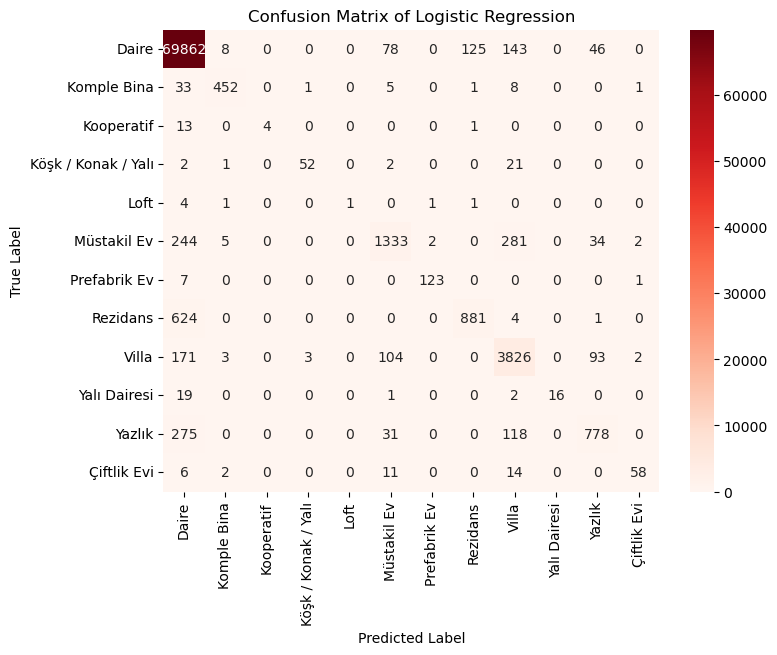

In [161]:
from sklearn.metrics import confusion_matrix 
conf_matrix = confusion_matrix(y_test, y_pred_ctb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

Матрица показывает, что модель эффективна для массового рынка (квартиры):69,868 правильных предсказаний из ~70,000.

In [165]:
import pickle

with open('CatBoostClassifier.pkl', 'wb') as file:
    pickle.dump(ctb_clf, file)

#### Модель для предсказания цены

In [163]:
df_processed['sub_type_encoded'] = le.fit_transform(df_processed['sub_type'])
df_processed = df_processed.drop('sub_type', axis=1)

In [167]:
df_processed

listing_type  tom  building_age  total_floor_count  floor_no  \
0                  2   30             0                 20        12   
1                  1   14             0                 20        13   
2                  1   30             0                  1        33   
3                  1   30             3                 20        13   
4                  1   30             0                 20        12   
...              ...  ...           ...                ...       ...   
399705             1  120             0                  0         0   
399706             2  162             0                  0         0   
399707             1  139             0                  0         0   
399708             1   97             0                  0         0   
399709             1    3             0                  0         0   

        room_count   size  heating_type   price_rub  city  county  district  \
0               12   90.0             0      6860.0    78     244      2424   
1                2   43.0             0    960400.0    78     244      2424   
2               12  110.0             0    303800.0    66     480      3220   
3               22  450.0             0  63700000.0    78      87      2721   
4               12   90.0             0   2842000.0    78     244      2424   
...            ...    ...           ...         ...   ...     ...       ...   
399705          14  110.0            15    362600.0     9     129      1240   
399706           1  110.0            15      2940.0    78     388        95   
399707          12  110.0            15    235200.0    61       4       998   
399708           3  110.0            15   4528320.0     6      22      3295   
399709          14  140.0            15    411600.0    42     305       314   

         latitude  longitude  sub_type_encoded  
0       40.888580  29.185654                 7  
1       40.888580  29.185654                 0  
2       41.159087  27.804107                 0  
3       41.042847  29.007528                 7  
4       40.888580  29.185654                 7  
...           ...        ...               ...  
399705  37.376917  27.266813                 0  
399706  40.967024  29.267131                 0  
399707  40.775519  30.402090                 0  
399708  36.886573  30.703024                 0  
399709  38.719906  35.505662                 0  

[399345 rows x 15 columns]

In [ ]:
from sklearn.ensemble import StackingRegressor, BaggingRegressor,  RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

X = df_processed.drop(['price_rub', 'county', 'district', 'latitude','longitude'], axis=1)
y = df_processed['price_rub']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("=== DecisionTreeRegressor ===")
bagging_reg = RandomForestRegressor(n_estimators=100, random_state=42)
bagging_reg.fit(X_train, y_train)
y_pred_bagging = bagging_reg.predict(X_test)

print(f"R² Score: {r2_score(y_test, y_pred_bagging):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_bagging):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_bagging)):.4f}")

=== DecisionTreeRegressor ===


Модель BaggingRegressor объясняет 63.24% дисперсии цен на недвижимость.

Средняя ошибка составляет ~368 тысяч рублей.

Крупные ошибки могут достигать миллионов.

In [584]:
print("\n=== XGBoost ===")
xgb_reg = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    objective='reg:squarederror'
)
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)

print(f"R² Score: {r2_score(y_test, y_pred_xgb):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb)):.4f}")


=== XGBoost ===
R² Score: 0.6544
MAE: 463805.6193
RMSE: 10555410.4043


Модель BaggingRegressor объясняет 65.44% дисперсии цен на недвижимость.

Средняя ошибка составляет ~464 тысяч рублей.

Крупные ошибки могут достигать миллионов.

In [586]:
from sklearn.ensemble import StackingRegressor, BaggingRegressor,  RandomForestRegressor, GradientBoostingRegressor

# Базовые модели для стакинга
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

# Метамодель
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression(),
    cv=5
)

stacking_regressor.fit(X_train, y_train)

y_pred = stacking_regressor.predict(X_test)

print("Результаты регрессии:")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

Результаты регрессии:
R² Score: 0.6426
MAE: 404039.0553
RMSE: 10734411.5117


Модель BaggingRegressor объясняет 64.26% дисперсии цен на недвижимость.

Средняя ошибка составляет ~404 тысяч рублей.

Крупные ошибки могут достигать миллионов.

In [692]:
print("""=== BaggingRegressor ===
R² Score: 0.6324
MAE: 367857.9413
RMSE: 10886352.0320

=== XGBoost ===
R² Score: 0.6544
MAE: 463805.6193
RMSE: 10555410.4043

=== StackingRegressor ===:
R² Score: 0.6426
MAE: 404039.0553
RMSE: 10734411.5117""")

=== BaggingRegressor ===
R² Score: 0.6324
MAE: 367857.9413
RMSE: 10886352.0320

=== XGBoost ===
R² Score: 0.6544
MAE: 463805.6193
RMSE: 10555410.4043

=== StackingRegressor ===:
R² Score: 0.6426
MAE: 404039.0553
RMSE: 10734411.5117


Сравнивая все модели можно сделать вывод, что XGBoost - лучшая модель, у нее более точные предсказания чем у других 0.65, но при этом StackingRegressor и BaggingRegressor ничуть не хуже, с результатами 0.64 и 0.63.

In [694]:
import pickle

with open('XGBRegressor.pkl', 'wb') as file:
    pickle.dump(xgb_reg, file)

### Общий вывод

1. Был загружен датасет на 400т. записей. Были удалены аномальные значения и заполнены медианными значениями пропуски. Перевели некоторые данные к соответсвующему типу.
2. Была проведена работа по определению широты и долготы.
3. Была проведена обработка и анализ нужных столбцов.
4. Был проведен частичный визуальный анализ в текущем файле проекта и полный в Datalens.
5. Были обучены модели регрессии и классификации для предсказания цены и типа жилья. В результате лучшей моделью регрессии оказалася XGBoost с счетчиком по R2-score 0.65. А модель классификации BaggingClassifier показал accuracy 0.95, macro avg 0.49
6. Корреляции между целевыми признаками были несущественные
7. Датасет был полностью обработан

   __Работу выполнили Ахкамова Камилла, Каскинбаев Ильнур, Сафина Лиана__